<center>

## Final Exam 

### Data Mining, Machine Learning and Deep Learning

### [KAN - CDSCO1004U]
<center>

    Importing Modules

In [1]:
# Importing modules 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import LinearSVC

from sklearn.metrics import roc_curve, auc

### Exploratory Data Analysis 
    Initial Overview

In [2]:
# Loading the data 
df = pd.read_csv("C:/Users/fredr/OneDrive/Documents/Master/Semester_2/ML/Project/heloc_dataset_v1.csv") # Change path if needed
pd.set_option('display.max_columns', None) # To show all columns 
df.head()

RiskPerformance  ExternalRiskEstimate  MSinceOldestTradeOpen  \
0             Bad                    55                    144   
1             Bad                    61                     58   
2             Bad                    67                     66   
3             Bad                    66                    169   
4             Bad                    81                    333   

   MSinceMostRecentTradeOpen  AverageMInFile  NumSatisfactoryTrades  \
0                          4              84                     20   
1                         15              41                      2   
2                          5              24                      9   
3                          1              73                     28   
4                         27             132                     12   

   NumTrades60Ever2DerogPubRec  NumTrades90Ever2DerogPubRec  \
0                            3                            0   
1                            4                            4   
2                            0                            0   
3                            1                            1   
4                            0                            0   

   PercentTradesNeverDelq  MSinceMostRecentDelq  MaxDelq2PublicRecLast12M  \
0                      83                     2                         3   
1                     100                    -7                         0   
2                     100                    -7                         7   
3                      93                    76                         6   
4                     100                    -7                         7   

   MaxDelqEver  NumTotalTrades  NumTradesOpeninLast12M  PercentInstallTrades  \
0            5              23                       1                    43   
1            8               7                       0                    67   
2            8               9                       4                    44   
3            6              30                       3                    57   
4            8              12                       0                    25   

   MSinceMostRecentInqexcl7days  NumInqLast6M  NumInqLast6Mexcl7days  \
0                             0             0                      0   
1                             0             0                      0   
2                             0             4                      4   
3                             0             5                      4   
4                             0             1                      1   

   NetFractionRevolvingBurden  NetFractionInstallBurden  \
0                          33                        -8   
1                           0                        -8   
2                          53                        66   
3                          72                        83   
4                          51                        89   

   NumRevolvingTradesWBalance  NumInstallTradesWBalance  \
0                           8                         1   
1                           0                        -8   
2                           4                         2   
3                           6                         4   
4                           3                         1   

   NumBank2NatlTradesWHighUtilization  PercentTradesWBalance  
0                                   1                     69  
1                                  -8                      0  
2                                   1                     86  
3                                   3                     91  
4                                   0                     80

In [4]:
# Getting information on each feature 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10459 entries, 0 to 10458
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   RiskPerformance                     10459 non-null  object
 1   ExternalRiskEstimate                10459 non-null  int64 
 2   MSinceOldestTradeOpen               10459 non-null  int64 
 3   MSinceMostRecentTradeOpen           10459 non-null  int64 
 4   AverageMInFile                      10459 non-null  int64 
 5   NumSatisfactoryTrades               10459 non-null  int64 
 6   NumTrades60Ever2DerogPubRec         10459 non-null  int64 
 7   NumTrades90Ever2DerogPubRec         10459 non-null  int64 
 8   PercentTradesNeverDelq              10459 non-null  int64 
 9   MSinceMostRecentDelq                10459 non-null  int64 
 10  MaxDelq2PublicRecLast12M            10459 non-null  int64 
 11  MaxDelqEver                         10459 non-null  in

There are only integers, and there are no missing values in the dataset

In [5]:
# Getting basic statistical details
df.describe()

ExternalRiskEstimate  MSinceOldestTradeOpen  MSinceMostRecentTradeOpen  \
count          10459.000000           10459.000000               10459.000000   
mean              67.425758             184.205373                   8.543455   
std               21.121621             109.683816                  13.301745   
min               -9.000000              -9.000000                  -9.000000   
25%               63.000000             118.000000                   3.000000   
50%               71.000000             178.000000                   5.000000   
75%               79.000000             249.500000                  11.000000   
max               94.000000             803.000000                 383.000000   

       AverageMInFile  NumSatisfactoryTrades  NumTrades60Ever2DerogPubRec  \
count    10459.000000           10459.000000                 10459.000000   
mean        73.843293              19.428052                     0.042738   
std         38.782803              13.004327                     2.513910   
min         -9.000000              -9.000000                    -9.000000   
25%         52.000000              12.000000                     0.000000   
50%         74.000000              19.000000                     0.000000   
75%         95.000000              27.000000                     1.000000   
max        383.000000              79.000000                    19.000000   

       NumTrades90Ever2DerogPubRec  PercentTradesNeverDelq  \
count                 10459.000000            10459.000000   
mean                     -0.142843               86.661536   
std                       2.367397               25.999584   
min                      -9.000000               -9.000000   
25%                       0.000000               87.000000   
50%                       0.000000               96.000000   
75%                       0.000000              100.000000   
max                      19.000000              100.000000   

       MSinceMostRecentDelq  MaxDelq2PublicRecLast12M   MaxDelqEver  \
count          10459.000000              10459.000000  10459.000000   
mean               6.762406                  4.928291      5.510183   
std               20.501250                  3.756275      3.971182   
min               -9.000000                 -9.000000     -9.000000   
25%               -7.000000                  4.000000      5.000000   
50%               -7.000000                  6.000000      6.000000   
75%               14.000000                  7.000000      8.000000   
max               83.000000                  9.000000      8.000000   

       NumTotalTrades  NumTradesOpeninLast12M  PercentInstallTrades  \
count    10459.000000            10459.000000          10459.000000   
mean        20.856965                1.253083             32.166460   
std         14.580905                3.068684             20.128634   
min         -9.000000               -9.000000             -9.000000   
25%         12.000000                0.000000             20.000000   
50%         20.000000                1.000000             31.000000   
75%         29.000000                3.000000             44.000000   
max        104.000000               19.000000            100.000000   

       MSinceMostRecentInqexcl7days  NumInqLast6M  NumInqLast6Mexcl7days  \
count                  10459.000000  10459.000000           10459.000000   
mean                      -0.325366      0.868152               0.812602   
std                        6.067556      3.179304               3.143698   
min                       -9.000000     -9.000000              -9.000000   
25%                       -7.000000      0.000000               0.000000   
50%                        0.000000      1.000000               1.000000   
75%                        1.000000      2.000000               2.000000   
max                       24.000000     66.000000              66.000000   

       NetFractionRevolvingBurden  NetFractionInstallBurden

Three 'describing' values: 
- `-9` No Bureau Record or No Investigation 
- `-8` No Usable/Valid Trades or Inquires 
- `-7` Condition not Met
We can see that -9 is the lowest number of every column.

There are potential outliers, since max value often exceds the 75 percentlie

    Graphical Exploration

In [6]:
# Function for bar plots 
def BarPlot(column):
    """
    Plots the value counts for a column in a Pandas DataFrame.

    Parameters:
        column (Pandas Series): The column to plot.

    Returns:
        fig (Matplotlib Figure): The figure containing the bar plot.
    """
    # get value counts for column
    value_counts = column.value_counts()

    # specify Tableau colors for bars
    colors = ['#0072B2', '#FDBF6F', '#009E73']

    # create bar chart using Matplotlib with specified colors
    plt.bar(value_counts.index, value_counts.values, color=colors)

    # set title and axis labels
    plt.title(f'{column.name}')
    plt.xlabel(f'{column.name} Values')
    plt.ylabel('Frequency')

    # create legend outside of chart
    handles = [plt.Rectangle((0,0),1,1, color=color) for color in colors]
    labels = value_counts.index

    # display chart
    plt.show()

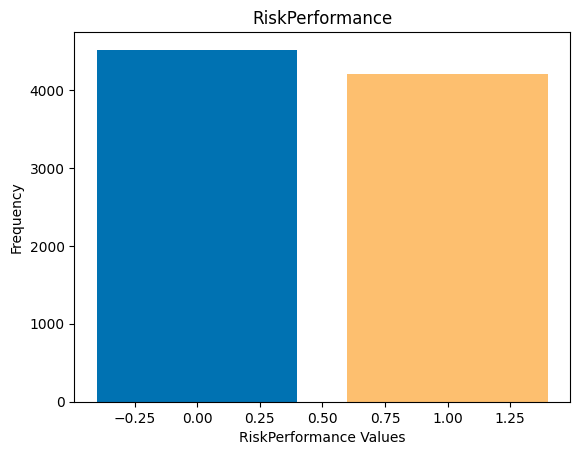

In [12]:
# Value Counts for RiskPerformance
BarPlot(df['RiskPerformance'])

We can see that there is a good balance between Good and Bad, with 47.% Good and 52.2% Bad. 

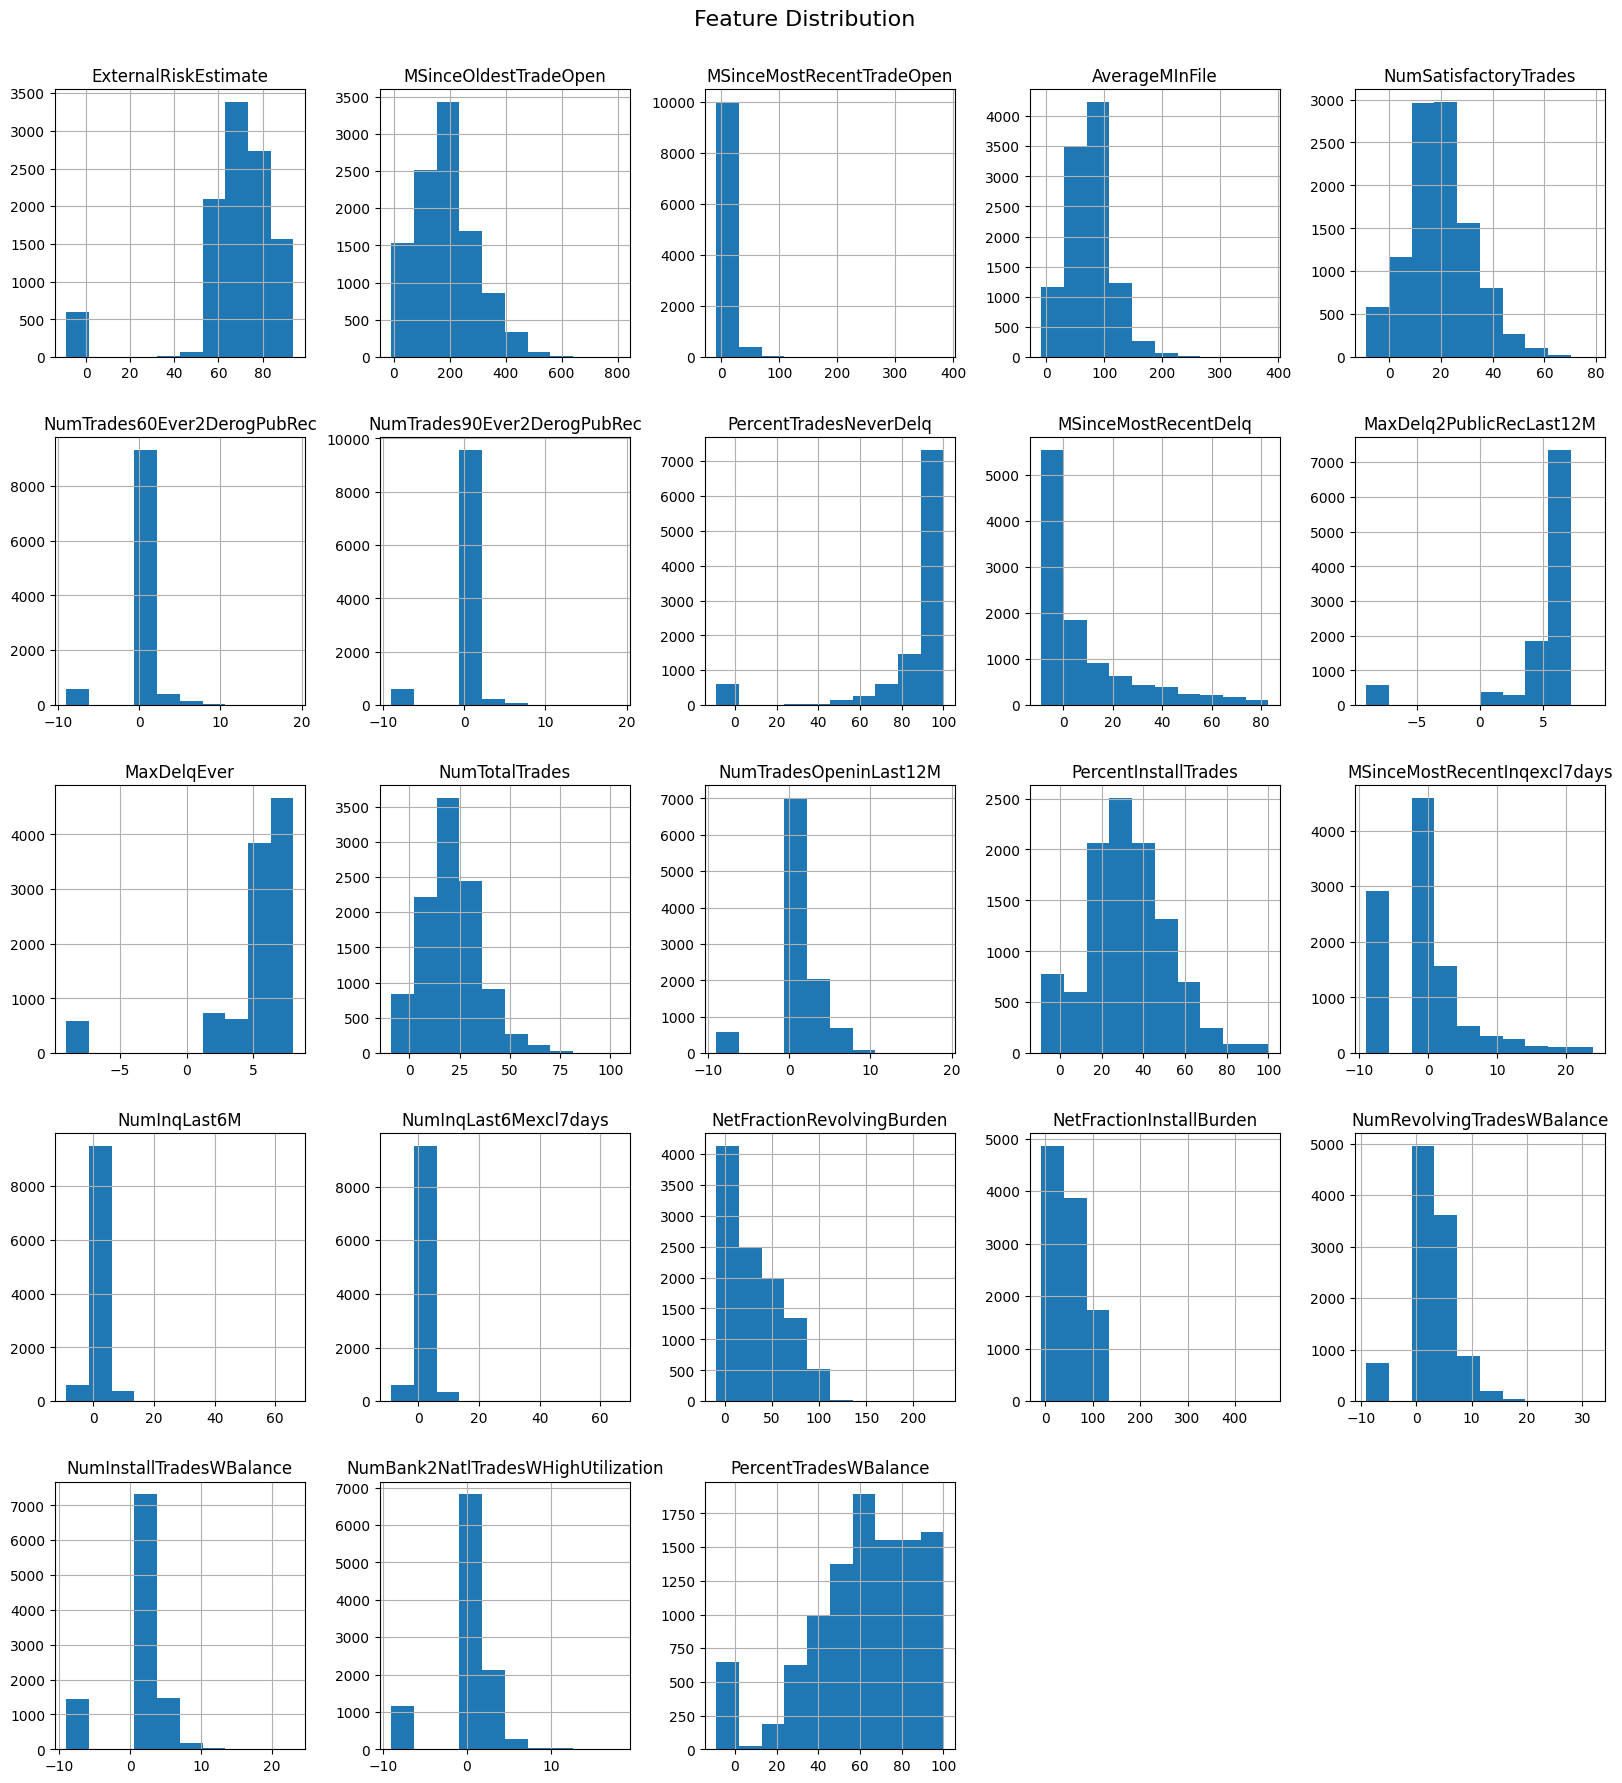

In [8]:
# Distribution with historgrams 
df.hist(bins=10, figsize=(20,20))

plt.suptitle('Feature Distribution', fontsize = 16)
plt.subplots_adjust(top = 0.94)
plt.show()

    Preprocessing

Encoding the target variable to numerical values

In [3]:
# Label Encoder for 'RiskPerformance'
label = LabelEncoder()
df['RiskPerformance'] = label.fit_transform(df['RiskPerformance'])

Detecting outliers

In [22]:
#Detecting outliers
def detect_outliers(df):
    fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(25,10))
    fig.suptitle('Boxplots of all columns', fontsize=20)

    outliers = set()
    for i, col in enumerate(df.columns):
        q1 = np.percentile(df[col], 25)
        q3 = np.percentile(df[col], 75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        column_outliers = set(df[(df[col] < lower_bound) | (df[col] > upper_bound)].index)
        outliers = outliers.union(column_outliers)
        
        # Plot boxplot in corresponding subplot
        ax = axes[i // 6][i % 6]
        ax.boxplot(df[col])
        ax.set_title(col)
        ax.scatter(list(column_outliers), df[col][list(column_outliers)], color='r')
    return outliers



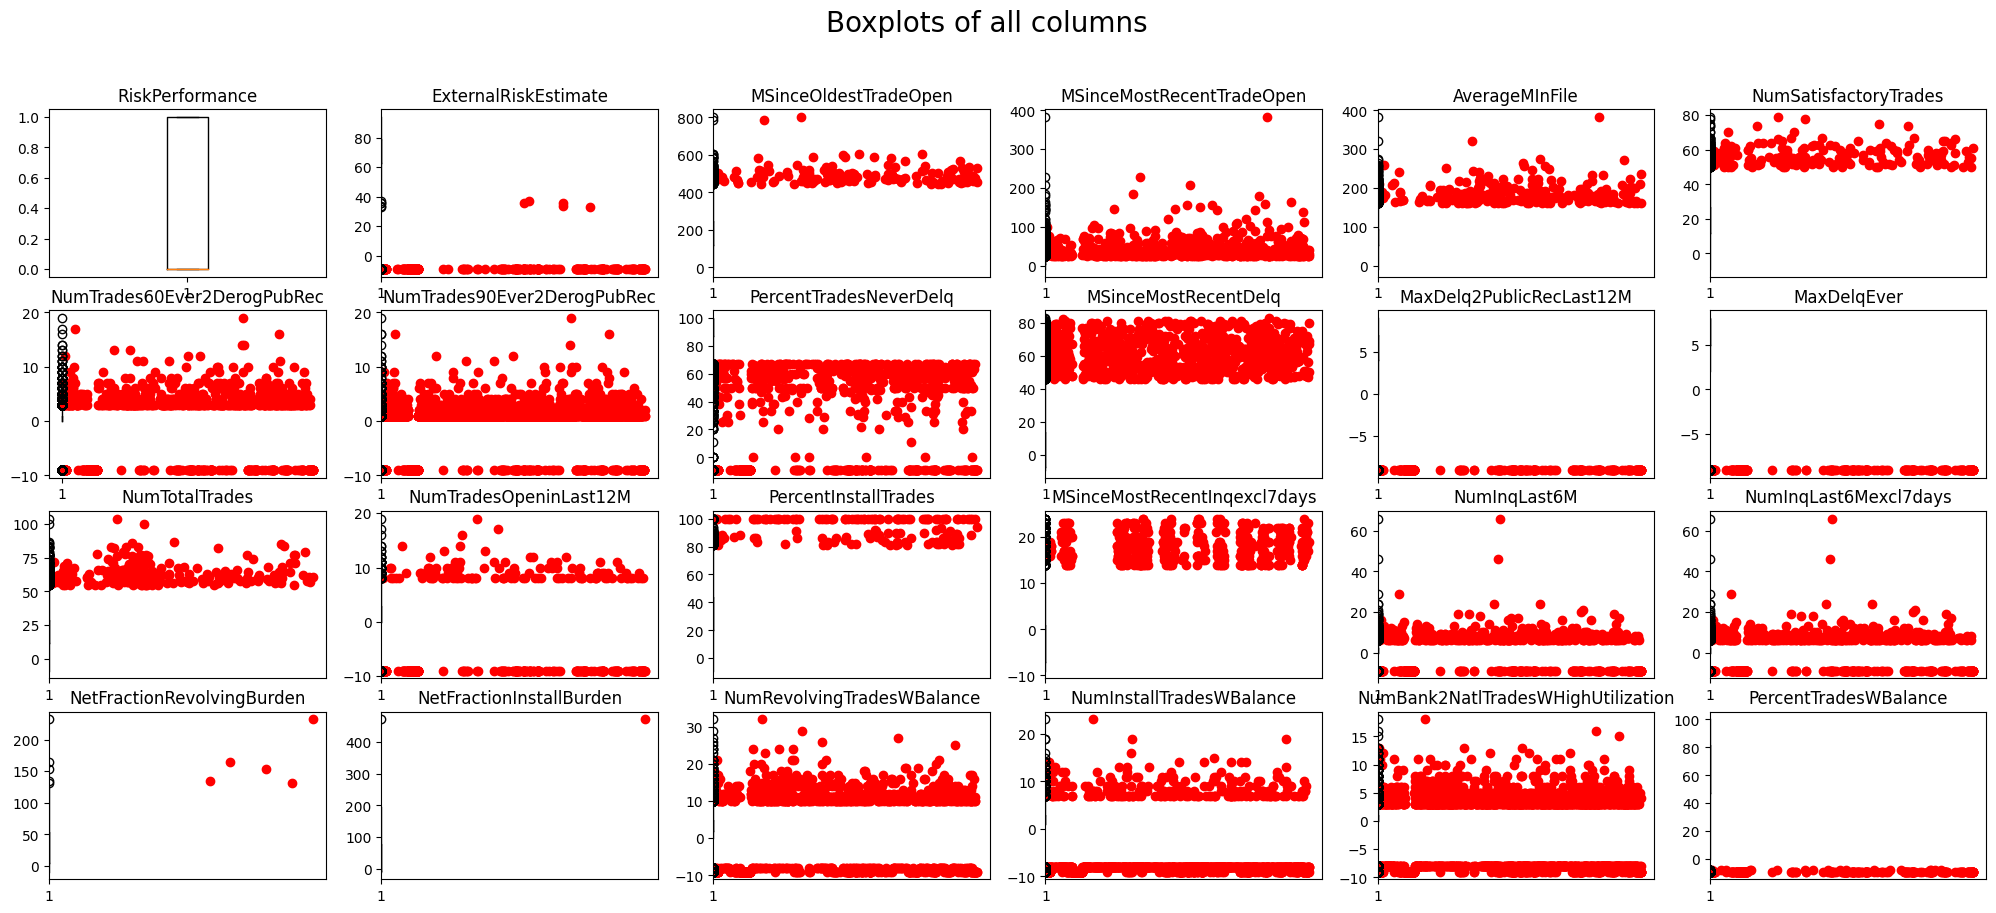

In [23]:
# Only works after label encoder
outliers = detect_outliers(df)
plt.show()

The red dots indicates wheter there are outliers for the given variable. It seems to be alot of outliers, but this is not the best indications. Due to the desribing minus values, as mentioned earlier, alot of outliers are detected for every column. But we do see that there are possibly some outliers for columns like: 
- `NetFractionRevolvingBurden`
- `NetFractionInstallBurden`
- `MSinceMostRecentTradeOpen` 
- `NumInqLast6M`

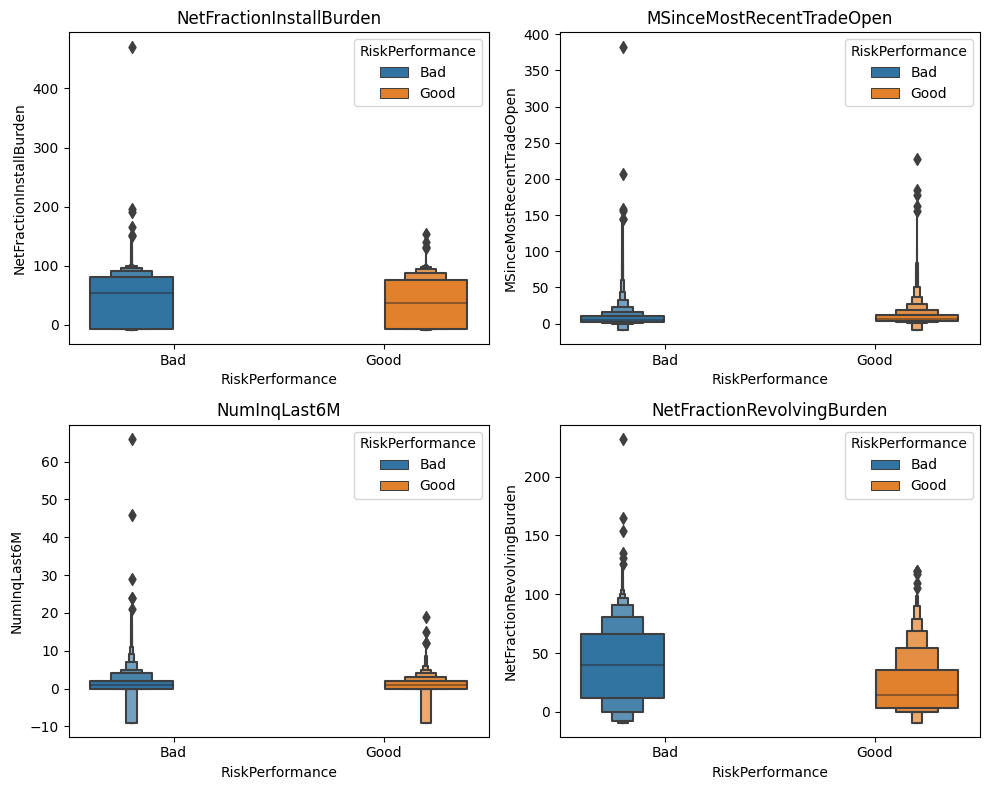

In [12]:
# Plotting the mentioned columns

# Create a figure and subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Plot the first boxplot
sns.boxenplot(x='RiskPerformance', y='NetFractionInstallBurden', hue='RiskPerformance', data=df, ax=axes[0, 0])
axes[0, 0].set_title('NetFractionInstallBurden')

# Plot the second boxplot
sns.boxenplot(x='RiskPerformance', y='MSinceMostRecentTradeOpen', hue='RiskPerformance', data=df, ax=axes[0, 1])
axes[0, 1].set_title('MSinceMostRecentTradeOpen')

# Plot the third boxplot
sns.boxenplot(x='RiskPerformance', y='NumInqLast6M', hue='RiskPerformance', data=df, ax=axes[1, 0])
axes[1, 0].set_title('NumInqLast6M')

# Plot the fourth boxplot
sns.boxenplot(x='RiskPerformance', y='NetFractionRevolvingBurden', hue='RiskPerformance', data=df, ax=axes[1, 1])
axes[1, 1].set_title('NetFractionRevolvingBurden')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [4]:
# Replacing Outliers with Null values
for x in ['NetFractionRevolvingBurden', 'NetFractionInstallBurden', 'MSinceMostRecentTradeOpen', 'NumInqLast6M']: 
    Q3, Q1 = np.percentile(df.loc[:,x], [75,25])
    IQR = Q3 - Q1

    Max = Q3+(1.5*IQR)
    Min = Q1-(1.5*IQR)

    # Data points thats outside of min or max bound with a NULL value 
    df.loc[df[x] < Min,x] = np.nan
    df.loc[df[x] > Max,x] = np.nan

# Dropping the null values
df.dropna(axis = 0, inplace = True)

Removing outliers from these columns has given me the highest performing SVM classifier. Removing anymore has reduced the accuracy. 

In [5]:
# Extracting feature variables and target column
y = df.loc[:,'RiskPerformance']
X = df.drop(['RiskPerformance'], axis = 1)

# Scaling 
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [6]:
# splitting the Data 
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.2, random_state=9)

# ML models

    Helper function

In [8]:
# Evaluation function that prints classification report and confusion matrix
def evaluate(y_test, y_pred, model_name):
    #print accuracy
    print(f"\033[34m{model_name}\033[0m")
    print(f" \033[32mAccuracy:\033[0m {round(accuracy_score(y_test, y_pred),3)}")
    print()
    print(f" \033[32mClassification Report:\033[0m")
    print(classification_report(y_test, y_pred))
    print(f" \033[32mConfusion Matrix:\033[0m")
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.title(f'{model_name}: Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

## SVM

Support Vector Machine
 Accuracy: 0.738

 Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.75      0.75       906
           1       0.73      0.72      0.73       839

    accuracy                           0.74      1745
   macro avg       0.74      0.74      0.74      1745
weighted avg       0.74      0.74      0.74      1745

 Confusion Matrix:


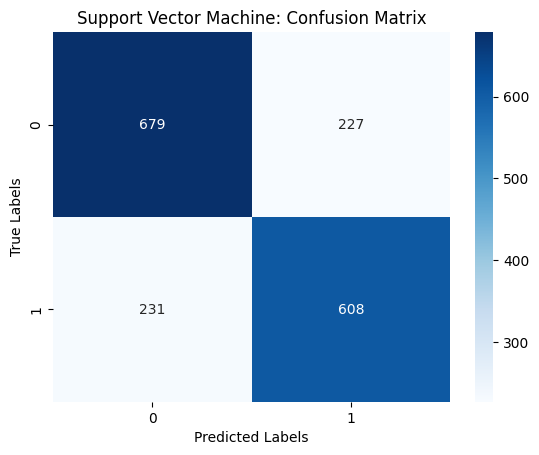

In [9]:
# Fitting our SVM Classifier
svm = LinearSVC(max_iter=1000000, random_state=9)
svm.fit(XTrain, yTrain)
y_pred_svm = svm.predict(XTest)

# Evaluate SVM
evaluate(yTest, y_pred_svm, "Support Vector Machine")

# Gridsearches

## Gridsearch for SVM

In [ ]:
# Define the parameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'loss': ['hinge', 'squared_hinge']
}

# Initialize the SVM classifier 
svm = LinearSVC(max_iter=1000000)

# Set up the GridSearchCV
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv = 15, verbose=2)

# Fit the GridSearchCV to the data 
grid_search_svm.fit(XTrain, yTrain)

# Get the best parameters 
best_params_svm = grid_search_svm.best_params_
print('best parameters for SVM:', best_params_svm)

In [ ]:
# USe the best estimator to make predictions on the test data 
y_pred_svm = grid_search_svm.best_estimator_.predict(XTest)

# Evaluating the model 
evaluate(yTest, y_pred_svm, 'Support Vector Machine')

### How to create ROC curve for SVM

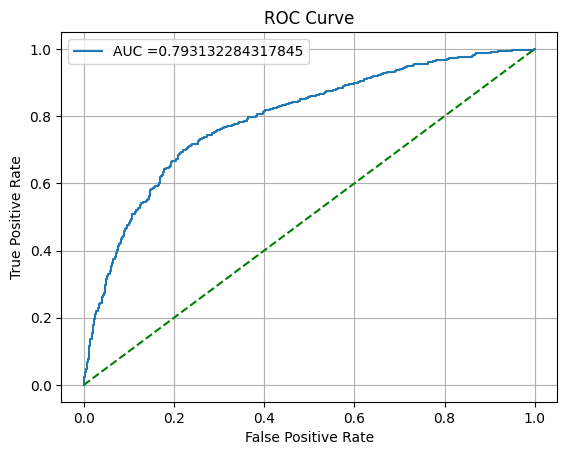

In [18]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

ypred = svm.decision_function(XTest)
fpr, tpr, threshold = roc_curve(yTest, ypred)

plt.grid()
plt.plot(fpr, tpr, label = 'AUC ='+str(auc(fpr, tpr)))
plt.plot([0,1], [0,1], 'g--')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()